In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

In [37]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [39]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [40]:
dataset.loc[:122, 'region'] = 0
dataset.loc[122:, 'region'] = 1
df = dataset

In [41]:
dataset['region'].value_counts()

region
1.0    124
0.0    122
Name: count, dtype: int64

In [42]:
df[['region']] = df[['region']].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [44]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
region         0
dtype: int64

In [45]:
df = df.dropna().reset_index()

In [46]:
df.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [47]:
df = df.drop(122).reset_index(drop = True)

In [49]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [50]:
## remove all the spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [61]:
df['Ws'].unique()

array([18., 13., 22., 16., 14., 15., 12., 19., 21., 20., 17., 26., 11.,
       10.,  9.,  8.,  6., 29.])

In [55]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0.0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1.0,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,2.0,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3.0,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,4.0,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [64]:
cols = ['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region']

df[cols] = df[cols].astype(float)

In [67]:
int_cols = ['day', 'month', 'year', 'Temperature', 'RH','Ws']
df[int_cols] = df[int_cols].astype(int)
df.drop(['index'], axis=1, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [69]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.0,3.0,7.0,1.0,3.0,0.0,not fire,0.0
1,2,6,2012,29,61,13,1.0,64.0,4.0,7.0,1.0,3.0,0.0,not fire,0.0
2,3,6,2012,26,82,22,13.0,47.0,2.0,7.0,0.0,2.0,0.0,not fire,0.0
3,4,6,2012,25,89,13,2.0,28.0,1.0,6.0,0.0,1.0,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.0,3.0,14.0,1.0,3.0,0.0,not fire,0.0


In [70]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.600823,77.403292,14.209877,49.020576,4.329218,16.222222,6.600823,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,1.915875,14.370033,12.391062,47.679582,4.141936,14.243746,7.444639,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.500000,5.000000,12.000000,1.000000,6.000000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.000000,11.000000,33.000000,3.000000,12.000000,4.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.000000,88.000000,20.000000,69.000000,7.000000,22.000000,11.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.000000,96.000000,65.000000,220.000000,19.000000,68.000000,31.000000,1.000000


In [72]:
## lets save the cleaned dataset
df.to_csv('algerian_forest_fire.csv', index=False)

## exploratory data analysis

In [88]:
df_copy = df.drop(['day', 'month', 'year'], axis=1)

In [89]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.0,3.0,7.0,1.0,3.0,0.0,not fire,0.0
1,29,61,13,1.0,64.0,4.0,7.0,1.0,3.0,0.0,not fire,0.0
2,26,82,22,13.0,47.0,2.0,7.0,0.0,2.0,0.0,not fire,0.0
3,25,89,13,2.0,28.0,1.0,6.0,0.0,1.0,0.0,not fire,0.0
4,27,77,16,0.0,64.0,3.0,14.0,1.0,3.0,0.0,not fire,0.0


In [90]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [91]:
## Encoding the classes category
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [93]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [94]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.0,3.0,7.0,1.0,3.0,0.0,0,0.0
1,29,61,13,1.0,64.0,4.0,7.0,1.0,3.0,0.0,0,0.0
2,26,82,22,13.0,47.0,2.0,7.0,0.0,2.0,0.0,0,0.0
3,25,89,13,2.0,28.0,1.0,6.0,0.0,1.0,0.0,0,0.0
4,27,77,16,0.0,64.0,3.0,14.0,1.0,3.0,0.0,0,0.0


In [97]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Data visualization

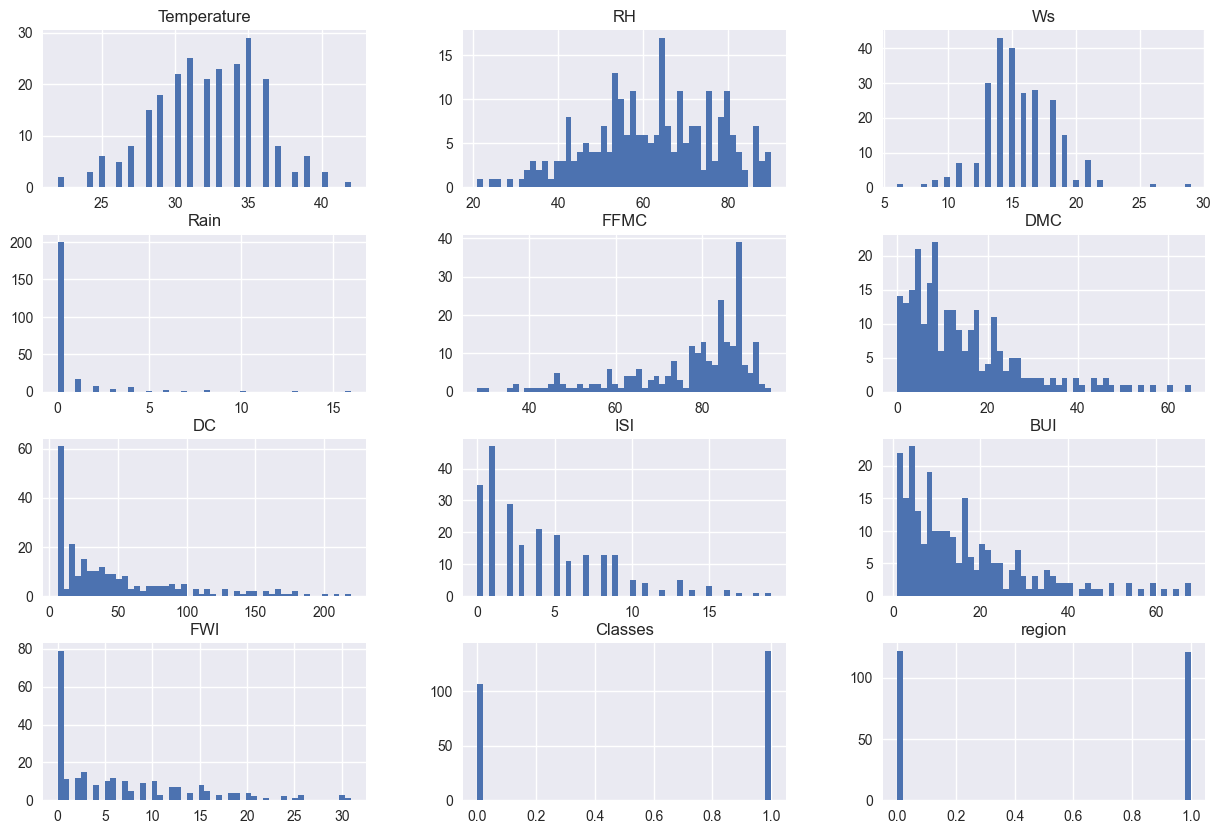

In [106]:
## plot density plot for all features

plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50, figsize=(15, 10))
plt.show()

In [110]:
## PERCENTAGE FOR PIE CHART
percentage = df_copy['Classes'].value_counts(normalize=True)*100

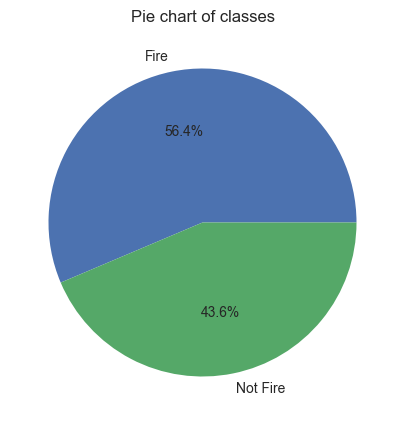

In [111]:
## plotting pie chat
Classlabels = ['Fire', 'Not Fire']
plt.figure(figsize=(10,5))
plt.pie(percentage, labels=Classlabels, autopct='%1.1f%%')
plt.title("Pie chart of classes")
plt.show()

In [126]:
## correlation

df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.322351,0.677443,0.485904,0.376003,0.601893,0.457610,0.561140,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.212946,-0.644674,-0.409140,-0.226695,-0.685212,-0.350936,-0.573959,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.170238,-0.166354,0.000571,0.078934,0.005143,0.031714,0.037493,-0.069964,-0.181160
Rain,-0.322351,0.212946,0.170238,1.000000,-0.496339,-0.253027,-0.268250,-0.294768,-0.265361,-0.270804,-0.326876,-0.033145
FFMC,0.677443,-0.644674,-0.166354,-0.496339,1.000000,0.604157,0.507689,0.729235,0.592232,0.679905,0.768896,0.222804
DMC,0.485904,-0.409140,0.000571,-0.253027,0.604157,1.000000,0.875447,0.680604,0.981594,0.875854,0.584676,0.191430
DC,0.376003,-0.226695,0.078934,-0.268250,0.507689,0.875447,1.000000,0.502481,0.941716,0.738373,0.510853,-0.078271
ISI,0.601893,-0.685212,0.005143,-0.294768,0.729235,0.680604,0.502481,1.000000,0.640407,0.918229,0.728555,0.269143
BUI,0.457610,-0.350936,0.031714,-0.265361,0.592232,0.981594,0.941716,0.640407,1.000000,0.856439,0.588203,0.089234
FWI,0.561140,-0.573959,0.037493,-0.270804,0.679905,0.875854,0.738373,0.918229,0.856439,1.000000,0.716741,0.197529


<Axes: >

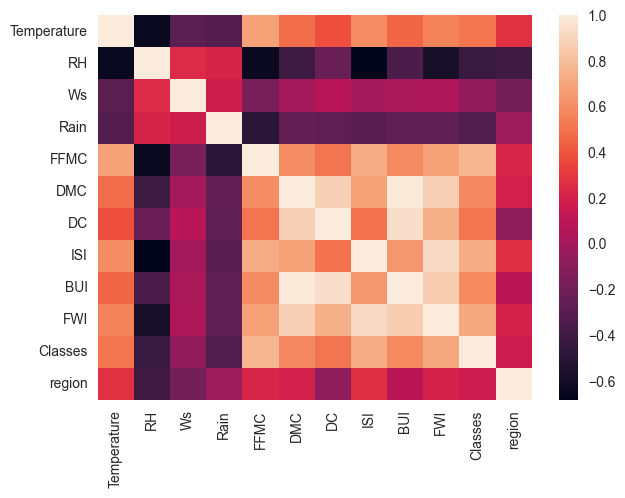

In [124]:
## Heatmap of correaltion
plt.figure(figsize=(7, 5))
sns.heatmap(df_copy.corr())


<Axes: ylabel='FWI'>

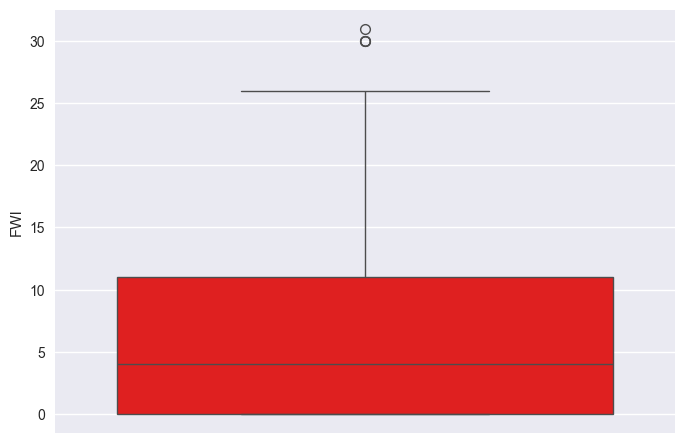

In [128]:
## Box plot 
sns.boxplot(df_copy['FWI'], color='r')

In [132]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

Text(0.5, 1.0, 'Fire analysis of Bejaia')

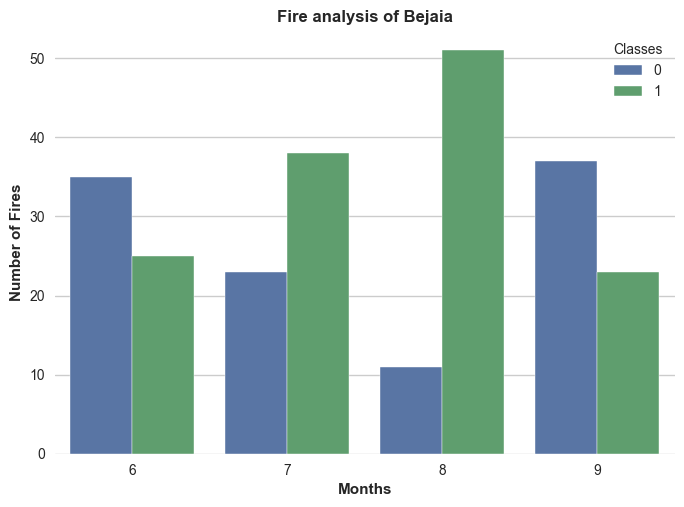

In [139]:
## Monthly fire analysis of begai

dftemp = df.loc[df['region'] == 0]
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire analysis of Bejaia", weight='bold')

Text(0.5, 1.0, 'Fire analysis of Sidi-Bel Abbes Region')

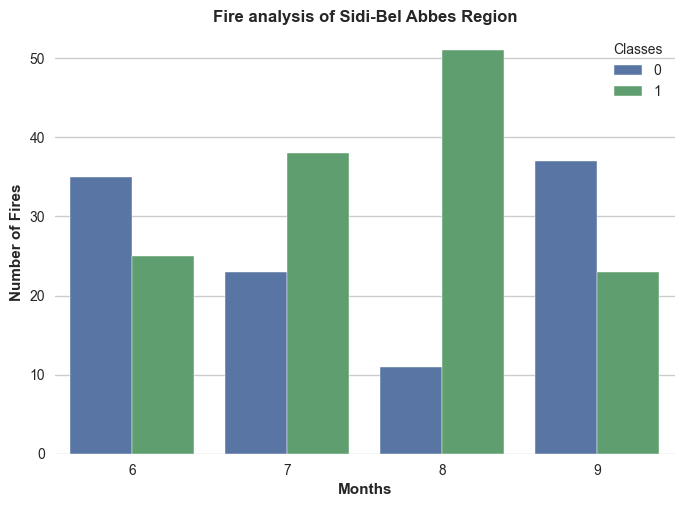

In [140]:
## Monthly fire analysis of Sidi-Bel Abbes Region

dftemp = df.loc[df['region'] == 1]
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire analysis of Sidi-Bel Abbes Region", weight='bold')